In [1]:
import pandas as pd
import numpy as np
import string
import re
import nltk

Text Preprocessing 
In this kernel, we will talk about the basic steps of text preprocessing.

These steps are needed for transferring text from human language to machine-readable format for further processing. We will also discuss text preprocessing tools. After a text is obtained, we start with text normalization. Text normalization includes:

- converting all letters to lower or upper case

- converting numbers into words or removing numbers

- removing punctuations, accent marks and other diacritics

- removing white spaces

- expanding abbreviations

- removing stop words, sparse terms, and particular words

- applying lemmatization

In [2]:
df_train = pd.read_csv("https://raw.githubusercontent.com/Nikhil-V98/Hackathons/main/Machinehack/Sentiment_Analysis/train.csv")
df_test = pd.read_csv("https://raw.githubusercontent.com/Nikhil-V98/Hackathons/main/Machinehack/Sentiment_Analysis/test.csv")

In [3]:
df_train.head(5)

,ID,author,Review,Sentiment
0,39467,rayinstirling,Today I'm working on my &quot;Quirky Q&quot; c...,2
1,30154,DirtyRose17,@ShannonElizab dont ya know? people love the h...,1
2,16767,yoliemichelle,ughhh rejected from the 09 mediation program. ...,0
3,9334,jayamelwani,@petewentz im so jealous. i want an octo drive,0
4,61178,aliisanoun,I remember all the hype around this movie when...,0


In [4]:
y = df_train['Sentiment']

In [28]:
train = df_train.copy()
test = df_test.copy()

train.drop(['ID','author'],axis =1,inplace=True)
test.drop(['ID','author'],axis =1,inplace=True)

In [29]:
train.columns = ['text','label']

In [30]:
train.head(5)

,text,label
0,Today I'm working on my &quot;Quirky Q&quot; c...,2
1,@ShannonElizab dont ya know? people love the h...,1
2,ughhh rejected from the 09 mediation program. ...,0
3,@petewentz im so jealous. i want an octo drive,0
4,I remember all the hype around this movie when...,0


In [26]:
for i  in range(train.shape[0]):
    train['text'][i]=train['text'][i].lower()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [32]:
for i  in range(train.shape[0]):
    train['text'][i].lower()

In [33]:
train.head(5)

,text,label
0,Today I'm working on my &quot;Quirky Q&quot; c...,2
1,@ShannonElizab dont ya know? people love the h...,1
2,ughhh rejected from the 09 mediation program. ...,0
3,@petewentz im so jealous. i want an octo drive,0
4,I remember all the hype around this movie when...,0


In [ ]:
!pip install transformers
!pip install -Uqq fastbook

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.9 MB 14.1 MB/s 
     |████████████████████████████████| 6.6 MB 47.4 MB/s 
     |████████████████████████████████| 120 kB 74.1 MB/s 
     |████████████████████████████████| 719 kB 35.2 MB/s 
     |████████████████████████████████| 365 kB 65.2 MB/s 
     |████████████████████████████████| 1.3 MB 61.6 MB/s 
     |████████████████████████████████| 212 kB 73.8 MB/s 
     |████████████████████████████████| 115 kB 74.2 MB/s 
     |████████████████████████████████| 127 kB 72.6 MB/s 


In [ ]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


Moving 0 files to the new cache system


0it [00:00, ?it/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
import fastbook
fastbook.setup_book()

Mounted at /content/gdrive


In [ ]:
from fastbook import *
from fastai.text.all import *

In [ ]:
train.columns = ['text','label']

In [ ]:
dls_lm = DataBlock(
    blocks=TextBlock.from_df('text', is_lm=True),
    get_x=ColReader('text'), 
    splitter=RandomSplitter(0.1)
).dataloaders(train, bs=128, seq_len=72)

In [ ]:
dls_clas = DataBlock(
    blocks=(TextBlock.from_df('text', vocab=dls_lm.vocab),CategoryBlock),
    get_x=ColReader('text'), 
    get_y=ColReader('label'), 
    splitter=RandomSplitter(0.1)
).dataloaders(train, bs=128, seq_len=72)

In [ ]:
learn_cls = text_classifier_learner(dls_clas, AWD_LSTM, drop_mult=0.5, 
                                metrics=accuracy).to_fp16()

SuggestedLRs(valley=0.00363078061491251)

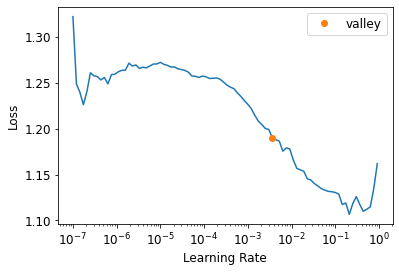

In [ ]:
learn_cls.lr_find()

In [ ]:
learn_cls.fit_one_cycle(1, 0.0036307)

epoch,train_loss,valid_loss,accuracy,time
0,0.896184,0.821636,0.627211,01:03


In [ ]:
learn_cls.freeze_to(-2)
learn_cls.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,0.832494,0.717024,0.675057,01:03


In [ ]:
learn_cls.freeze_to(-3)
learn_cls.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.779529,0.672004,0.703175,01:14


In [ ]:
learn_cls.unfreeze()
learn_cls.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.695016,0.669033,0.711565,01:11
1,0.677873,0.665803,0.714512,01:10


In [ ]:
learn_cls.show_results()

,text,category,category_
0,"xxbos xxrep 3 * xxmaj warning - this review contains "" plot spoilers , "" though nothing could "" spoil "" this movie any more than it already is . xxmaj it really xxup is that bad . xxrep 3 * \n\n xxmaj before i begin , xxmaj i 'd like to let everyone know that this definitely is one of those so - incredibly - bad - that - you - fall - over - laughing movies . xxmaj if you 're in a lighthearted mood and need a very hearty laugh , this is the movie for you . xxmaj now without further ado , my review : \n\n xxmaj this movie was found in a bargain bin at wal - mart . xxmaj that should be the first clue as to how good of a movie it is . xxmaj secondly , it stars the lame action",0,0
1,"xxbos ' the xxmaj merchant of xxmaj venice ' is one of xxmaj shakespeare 's better - known plays and is still regularly performed in the theatre . xxmaj incredibly , however , this film would seem to be the first - ever xxmaj english - language version made for the cinema rather than television . xxmaj there were a number of versions made in xxmaj britain or xxmaj america during the early days of the cinema , but these were all silents . \n\n xxmaj the reason for this neglect of the play may be connected with xxunk about the play 's alleged anti - semitism , a subject which has been even more sensitive since the rise to power of the xxmaj nazis in 1933 . ( this may explain why all previous versions were made during the silent era ; in xxunk or 1922 it would have",2,2
2,"xxbos xxmaj who knew ? xxmaj dowdy xxmaj queen xxmaj victoria , the plump xxmaj monarch who was a virtual recluse for 40 years after the death of her husband , xxmaj prince xxmaj albert , actually led a life fraught with drama and intrigue in her younger days . ' the xxmaj young xxmaj victoria ' not only chronicles the young xxmaj queen 's romance with her husband - to - be but also does a pretty good job of detailing the political machinations surrounding her ascent to the throne . \n\n xxmaj the xxmaj act i ' set - up ' draws you in right away . xxmaj following the death of xxmaj victoria 's father , the xxmaj duke of xxmaj kent in xxunk , less than a year after xxmaj victoria 's birth , the xxmaj duchess of xxmaj kent eventually hooked up with former xxmaj",2,2
3,"xxbos * xxmaj some spoilers * \n\n xxmaj this movie is sometimes subtitled "" life xxmaj everlasting . "" xxmaj that 's often taken as reference to the final scene , but more accurately describes how dead and buried this once - estimable series is after this sloppy and illogical send - off . \n\n xxmaj there 's a "" hey kids , let 's put on a show air "" about this telemovie , which can be endearing in spots . xxmaj some fans will feel like insiders as they enjoy picking out all the various cameo appearances . xxmaj co - writer , co - producer xxmaj tom xxmaj fontana and his pals pack the goings - on with friends and favorites from other shows , as well as real xxmaj baltimore xxunk . \n\n xxmaj that 's on top of the returns of virtually all the members",0,0
4,"xxbos xxmaj the following "" review "" is one from the wrong side of the tracks , meaning two things : xxmaj you will hear nothing but praises coming from me and do n't be fooled by my rating . i also could tell you that this review contains no spoilers , but technically … that 's a lie . \n\n xxmaj well , … xxmaj screw the review . xxmaj i 'm just going to ramble a bit . xxmaj it has been a while since i had so much fun with such a bad film . xxmaj and if you can not enjoy this piece of utter drivel , then you simply have no sense of humor . xxmaj first off , this movie was meant to be taken seriously , and that 's the main aspect were the fun is coming from . xxmaj the story ?",0,2
5,"xxbos xxmaj main theme in this xxmaj dirty xxmaj harry is that revenge is a dish best served cold . xxmaj sandra xxmaj locke is as cold in this film as she is beautiful . xxmaj locke is an "" 8 "" normally , but , with a deadly pistol in her purse , ""

In [ ]:
learn_cls.predict('')

In [ ]:
test

<function fastcore.test.test(a, b, cmp, cname=None)>

### Lower casing: Converting a word to lower case (NLP -> nlp).

In [ ]:
for i  in range(train.shape[0]):
    train['Review']=train['Review'][i].lower()

### Tokenization: Splitting the sentence into words.

In [ ]:
train1 = df_train.copy()

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
words=[]
for i  in range(train1.shape[0]):
    words.append(nltk.word_tokenize(train1['Review'][i]))
    

In [ ]:
words

[['Today',
  'I',
  "'m",
  'working',
  'on',
  'my',
  '&',
  'quot',
  ';',
  'Quirky',
  'Q',
  '&',
  'quot',
  ';',
  'cue',
  'or',
  'maybe',
  'it',
  'will',
  'become',
  'a',
  'concerto'],
 ['@',
  'ShannonElizab',
  'dont',
  'ya',
  'know',
  '?',
  'people',
  'love',
  'the',
  'human',
  'society'],
 ['ughhh',
  'rejected',
  'from',
  'the',
  '09',
  'mediation',
  'program',
  '.',
  'SUCKSSSS',
  '.'],
 ['@',
  'petewentz',
  'im',
  'so',
  'jealous',
  '.',
  'i',
  'want',
  'an',
  'octo',
  'drive'],
 ['I',
  'remember',
  'all',
  'the',
  'hype',
  'around',
  'this',
  'movie',
  'when',
  'Aaliyah',
  'was',
  'killed',
  '.',
  'Being',
  'a',
  'fan',
  'of',
  'Ms.',
  'Rice',
  "'s",
  'novels',
  ',',
  'my',
  'first',
  'thought',
  'was',
  '``',
  'how',
  'can',
  'they',
  'do',
  'Queen',
  'Of',
  'The',
  'Damned',
  'without',
  'doing',
  'Vampire',
  'Lestat',
  'first',
  '?',
  '``',
  '<',
  'br',
  '/',
  '>',
  '<',
  'br',
  '/',
  

### Stop words removal: Stop words are very commonly used words (a, an, the, etc.)

In [ ]:
from nltk.corpus import stopwords